# Промежуточный проект

#### Исходные данные

__· olist_customers_dataset.csv__ — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя  
customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)  
customer_zip_code_prefix —  почтовый индекс пользователя  
customer_city —  город доставки пользователя  
customer_state —  штат доставки пользователя  

__· olist_orders_dataset.csv__ —  таблица заказов

order_id —  уникальный идентификатор заказа (номер чека)  
customer_id —  позаказный идентификатор пользователя  
order_status —  статус заказа  
order_purchase_timestamp —  время создания заказа  
order_approved_at —  время подтверждения оплаты заказа  
order_delivered_carrier_date —  время передачи заказа в логистическую службу  
order_delivered_customer_date —  время доставки заказа  
order_estimated_delivery_date —  обещанная дата доставки  

__· olist_order_items_dataset.csv__ —  товарные позиции, входящие в заказы

order_id —  уникальный идентификатор заказа (номер чека)  
order_item_id —  идентификатор товара внутри одного заказа  
product_id —  ид товара (аналог штрихкода)  
seller_id — ид производителя товара  
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике  
price —  цена за единицу товара  
freight_value —  вес товара

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from operator import attrgetter

In [2]:
df1 = pd.read_csv('olist_customers_dataset.csv')                  #таблица с уникальными идентификаторами пользователей
df2 = pd.read_csv('olist_orders_dataset.csv',                     #таблица заказов
                  parse_dates=["order_purchase_timestamp",      
                               "order_approved_at",
                               "order_delivered_carrier_date",
                               "order_delivered_customer_date",
                               "order_estimated_delivery_date"])                
df3 = pd.read_csv('olist_order_items_dataset.csv',                #товарные позиции, входящие в заказы 
                  parse_dates=["shipping_limit_date"])           

In [3]:
df1.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [4]:
df2.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [5]:
df3.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

# Разведывательный анализ

#### Наполнение таблиц:

In [11]:
df1.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [12]:
df2.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [13]:
df3.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


#### Размеры таблиц:

In [14]:
df1.shape #(99441, 5)

(99441, 5)

In [15]:
df2.shape #(99441, 8)

(99441, 8)

In [16]:
df3.shape #(112650, 7)

(112650, 7)

#### Пропущенные значения:

In [17]:
df1.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [18]:
df2.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
df3.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### Возможные статусы заказов

In [19]:
df2.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

# Задание 1

#### Сколько у нас пользователей, которые совершили покупку только один раз?

Для выполнения задачи фактом покупки будем считать наличие в заказе статуса __delivered__ и наличие времени подтверждения оплаты в колонке __order_approved_at.__  
При этом анализ истории покупок будем проводить по __customer_unique_id__ (колонка __customer_id__ показывает, что их количество уникальных значений меньше, чем __customer_unique_id__ - *96096* против *99441* (см. ниже код). Возможно это связано с тем, что были повторно созданы аккаунты с одними и теми же паспортными данными. 

Число уникальных значений индентификаторов пользователей (аналог номера паспорта):

In [36]:
df1.customer_unique_id.nunique() #96096

96096

Число уникальных значений позаказных идентификаторов пользователей.

In [33]:
df2.customer_id.nunique() #99441

99441

Здесь нам необходимо объединить таблицы *df1* (таблица с уникальными идентификаторами пользователей) и *df2* (таблица заказов) по колонке __customer_id__ для дальнейшей группировки по __customer_unique_id__ и подсчета пользователей, которые совершили покупку только один раз:

In [4]:
combined_users_orders = df1.merge(df2, on='customer_id')

In [6]:
combined_users_orders.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Уберем строки, где отсутствует записи о времени подвтерждения по оплатам:

In [5]:
combined_users_orders.dropna(subset = ['order_approved_at'], inplace=True)

Пользователи, совершивие одну покупку:

In [6]:
one_purchase = combined_users_orders.query("order_status == 'delivered'") \
                                    .groupby("customer_unique_id", as_index=False) \
                                    .agg({"order_purchase_timestamp": "count"}) \
                                    .rename(columns={"order_purchase_timestamp": "quantity"}) \
                                    .sort_values("quantity", ascending=False) \
                                    .query("quantity == 1")

In [7]:
one_purchase

,customer_unique_id,quantity
63178,ad0adff48be9c5f67cb35fd0895b42e7,1
63009,ac95e1a03943d13b3a18952c4dcb3166,1
63012,ac96769b758dad3bd572bc5e3fcb8511,1
63606,ae350b2be591bc6459648070d2dc4351,1
62324,aab8da7cf44935b6239eafd8750d6ec4,1
...,...,...
31559,5656a8fabc8629ff96b2bc14f8c09a27,1
31558,56560124a5cc70119deb685775639ea7,1
31557,5655ee330a79bd1fd1e5fb220c2436dd,1
31556,5655967ad654dc2d2affca3502631db7,1


In [8]:
print(f'Число пользователей, совершивших покупку только один раз, составляет {one_purchase.shape[0]}.')

Число пользователей, совершивших покупку только один раз, составляет 90545.


# Задание 2

#### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Для выполнения задачи фактом недоставленного заказа будем считать заказы со статусом отличным от "*доставлен пользователю*" (__order_status__ != __delivered__). 

Определим число недоставленных заказах по той или иной причине:

In [14]:
undelivered_orders = combined_users_orders.query("order_status != 'delivered'") \
                                          .groupby("order_status", as_index=False) \
                                          .agg({"customer_id": "count"}) \
                                          .rename(columns={"customer_id": "number_of_undelivered_orders"}) \
                                          .sort_values("number_of_undelivered_orders", ascending=False) 

In [15]:
undelivered_orders

,order_status,number_of_undelivered_orders
4,shipped,1107
5,unavailable,609
1,canceled,484
2,invoiced,314
3,processing,301
0,approved,2


Число недоставленных заказов мы определили. Теперь, чтобы найти сколько заказов в среднем в месяц не доставляется по той или иной причине, нам необходимо определить период (число месяцев) работы магазина, чтобы число "отмен" в таблице __undelivered_orders__ разделить на число месяцев.
Период работы магазина определим по колонке __order_purchase_timestamp__, примем, что разница в крайней и первой датах создания заказа является периодом работы магазина: 

In [16]:
delta = combined_users_orders.query("order_status != 'delivered'").order_purchase_timestamp.max() - \
        combined_users_orders.query("order_status != 'delivered'").order_purchase_timestamp.min()

Определим количество месяцев работы магазина, округлив до целого в большую сторону:

In [17]:
period = math.ceil(delta.days / (365/12))

In [18]:
print(f'Магазин работает {period} месяцев.')

Магазин работает 24 месяцев.


Зная период работы магазина, определим среднее число недоставленных заказов по разным причинам в месяц:

In [22]:
undelivered_orders['undelivered_orders_per_month'] = undelivered_orders.number_of_undelivered_orders \
                                                                       .apply(lambda x: round(x/period, 2))

In [23]:
undelivered_orders

,order_status,number_of_undelivered_orders,undelivered_orders_per_month
4,shipped,1107,46.12
5,unavailable,609,25.38
1,canceled,484,20.17
2,invoiced,314,13.08
3,processing,301,12.54
0,approved,2,0.08


Визуализируем недоставленные заказы:

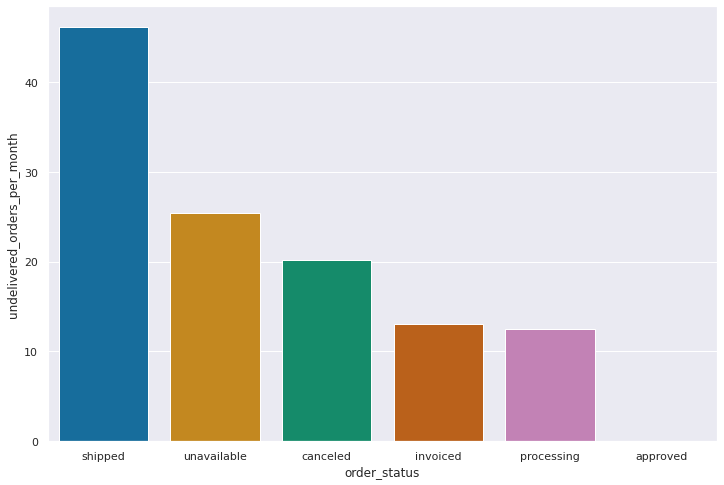

In [19]:
sns.barplot(data=undelivered_orders, x="order_status", y="undelivered_orders_per_month", palette='colorblind')
sns.set(rc = {'figure.figsize':(12,8)})

# Задание 3

#### По каждому товару определить, в какой день недели товар чаще всего покупается.

Здесь нам необходимо объединить таблицы *df2* (таблица заказов) и *df3* (товарные позиции):

In [24]:
combined_orders_itmes = df2.merge(df3, on='order_id')

Посмотрим на пропущенные значения в данных:

In [25]:
combined_orders_itmes.query("order_status == 'delivered'").isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
dtype: int64

Теперь для более удобной работы отберем лишь интересующие нас колонки - __product_id__, __order_approved_at__ и к ним добавим колонку __weekday__, т.е. день недели оплаты товара.
Также удалим записи, где отсутствует время оплаты (см. выше код) в колонке __order_approved_at__.

In [26]:
temporary = combined_orders_itmes.query("order_status == 'delivered'")[['product_id', 'order_approved_at']].dropna()

Теперь, чтобы определить в какой день недели товар чаще покупается, создадим колонку, в которой отметим день недели покупки. Для этого воспользуемся атрибутом времени:

In [27]:
temporary['weekday'] = temporary['order_approved_at'].dt.weekday

В получившейся таблице дни недели представлены числами в диапазоне [0:6], где 0 - понедельник, 1 - вторник, 2 - среда и т.д.

Теперь определим какой товар в какой день недели чаще покупался. Приложу два варанта кода: первый выводит день, в который было больше всего покупок определенного товара. Недостатком кода является тот факт, что при двух или более днях с одинаковым количеством продаж будет выведен лишь один день; второй - выводим для каждого товара покупки за все дни недели:

*Первый вариант:*

In [28]:
frequency_purchaces_v1 = temporary.groupby(['product_id', 'weekday'], as_index=False) \
                                  .agg({'order_approved_at': 'count'}) \
                                  .rename(columns={"order_approved_at": "quantity"}) \
                                  .sort_values(['product_id', 'quantity'], ascending=[False, False]) \
                                  .groupby("product_id") \
                                  .head(1)

In [29]:
frequency_purchaces_v1

,product_id,weekday,quantity
59835,fffe9eeff12fcbd74a2f2b007dde0c58,2,1
59832,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,3
59831,fff9553ac224cec9d15d49f5a263411f,5,1
59830,fff81cc3158d2725c0655ab9ba0f712c,0,1
59828,fff6177642830a9a94a0f2cba5e476d1,0,1
...,...,...,...
5,000d9be29b5207b54e86aa1b1ac54872,1,1
3,000b8f95fcb9e0096488278317764d19,2,1
2,0009406fd7479715e4bef61dd91f2462,4,1
1,00088930e925c41fd95ebfe695fd2655,1,1


*Второй вариант:*

In [30]:
frequency_purchaces_v2 = temporary.groupby(['product_id', 'weekday'], as_index=False) \
                                  .agg({'order_approved_at': 'count'}) \
                                  .rename(columns={"order_approved_at": "quantity"}) \
                                  .sort_values(['product_id', 'quantity'], ascending=[False, False]) \
                                  .pivot(index='product_id', columns='weekday', values='quantity')

In [31]:
frequency_purchaces_v2

weekday,0,1,2,3,4,5,6
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,NaN,NaN,NaN,NaN,NaN,NaN,1.0
00088930e925c41fd95ebfe695fd2655,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0009406fd7479715e4bef61dd91f2462,NaN,NaN,NaN,NaN,1.0,NaN,NaN
000b8f95fcb9e0096488278317764d19,NaN,NaN,1.0,NaN,1.0,NaN,NaN
000d9be29b5207b54e86aa1b1ac54872,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,1.0,NaN,NaN,NaN,NaN,1.0,NaN
fff81cc3158d2725c0655ab9ba0f712c,1.0,NaN,NaN,NaN,NaN,NaN,NaN
fff9553ac224cec9d15d49f5a263411f,NaN,NaN,NaN,NaN,NaN,1.0,NaN


Выполним небольшую проверку на тот факт, что товары не потеряли:

In [32]:
temporary.product_id.nunique() == frequency_purchaces_v1.shape[0] == frequency_purchaces_v2.shape[0]

True

# Задание 4

#### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

Подсчет покупок для каждого пользователя будем вести по __customer_unique_id__ и количеству чеков - __order_id__.

Здесь нам необходимо объединить таблицы *df1* (таблица с уникальными идентификаторами пользователей) и *df2* (таблица заказов):

In [33]:
users_and_orders = df1.merge(df2, on="customer_id")

Отберем заказы со статусом delivered и интересующие нас колонки, также уберем записи без дат в колонке __order_approved_at__:

In [34]:
users_and_orders_delivered = users_and_orders[["customer_unique_id", 
                                               "order_approved_at", 
                                               "order_id", 
                                               "order_status"]] \
                                               .query("order_status == 'delivered'") \
                                               .dropna()

In [35]:
users_and_orders_delivered

,customer_unique_id,order_approved_at,order_id,order_status
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,00e7ee1b050b8499577073aeb2a297a1,delivered
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,29150127e6685892b6eab3eec79f59c7,delivered
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,951670f92359f4fe4a63112aa7306eba,delivered
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 16:08:45,6760e20addcf0121e9d58f2f1ff14298,delivered
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:35:12,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:30:03,fed4434add09a6f332ea398efd656a5c,delivered
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,e31ec91cea1ecf97797787471f98a8c2,delivered


Создадим колонку формата "год-месяц" для дальнейшей работы:

In [36]:
users_and_orders_delivered["date"] = users_and_orders_delivered["order_approved_at"].dt.to_period('M')

Определим количество покупок для каждого пользователя по месяцам:

In [37]:
user_avg_purchases = users_and_orders_delivered.groupby(["customer_unique_id", "date"], as_index=False) \
                                               .agg({"order_id": "count"}) \
                                               .rename(columns={"order_id": "quantity"}) \
                                               .sort_values("date", ascending=False)

Добавим колонку количества недель в месяце покупок:

In [38]:
user_avg_purchases['week_in_month'] = round(user_avg_purchases.date.dt.daysinmonth / 7, 2)

И среднее количество покупок в неделю (по месяцам):

In [39]:
user_avg_purchases["avg_purchase_by_week"] = round(user_avg_purchases.quantity / user_avg_purchases.week_in_month, 2)

In [40]:
user_avg_purchases

,customer_unique_id,date,quantity,week_in_month,avg_purchase_by_week
86820,e9494560865a85c42137b2620c9a0889,2018-08,1,4.43,0.23
44222,76dbd05cdab2c1e8f6db5de719eb2838,2018-08,1,4.43,0.23
7116,130825f7be6a31dab586c567c592b2cb,2018-08,1,4.43,0.23
44173,76bcd5ee3764110896c71c03bad849ca,2018-08,1,4.43,0.23
35147,5e452c7100eb681c1ae6cd5662f1d153,2018-08,1,4.43,0.23
...,...,...,...,...,...
31930,55b9662183a72ec77b8f467ff8d42fa3,2016-10,1,4.43,0.23
69439,ba8e8db5ac53ffa4aca56c6a645b9e05,2016-10,1,4.43,0.23
57259,99e41e69b60bd63edd83935499523063,2016-10,1,4.43,0.23
81746,db890d2b3c871e8e4298f21bc8a7736b,2016-10,1,4.43,0.23


# Задание 5

#### Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Для выполнения задачи воспользуемся готовой таблицей __users_and_orders_delivered__ из п.4 и отеберем необходимый для когортного анализа период, и отберем интересующие нас таблицы:

In [41]:
users_and_orders_delivered

,customer_unique_id,order_approved_at,order_id,order_status,date
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,29150127e6685892b6eab3eec79f59c7,delivered,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,951670f92359f4fe4a63112aa7306eba,delivered,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07
...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 16:08:45,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:35:12,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:30:03,fed4434add09a6f332ea398efd656a5c,delivered,2018-04
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11


Отеберем нужные нам колонки и период в один год:

In [42]:
events = users_and_orders_delivered[["customer_unique_id", "order_approved_at"]] \
         .query("'2017-01-01 00:00:00' <=order_approved_at <= '2017-12-31 23:59:59'").dropna()

In [43]:
events

,customer_unique_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:25:11
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:55:41
10,2a7745e1ed516b289ed9b29c7d0539a5,2017-11-27 18:01:20
12,918dc87cd72cd9f6ed4bd442ed785235,2017-09-09 10:10:17
...,...,...
99430,277490f0d435b602fe4475d4b89e9181,2017-05-25 02:50:25
99433,e7f8760e2bbd2f1986bebd99596c088e,2017-03-15 21:04:08
99435,4b5820135d360a45552b5163835b1d89,2017-12-18 00:17:27
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20


Создадим колонку с месяцем оплаты пользователей и месячную когорту первой оплаты для каждого пользователя:

In [44]:
events['month'] = events['order_approved_at'].dt.to_period('M')
events['cohort'] = events.groupby('customer_unique_id')['order_approved_at'] \
                         .transform('min') \
                         .dt.to_period('M')

In [45]:
events

,customer_unique_id,order_approved_at,month,cohort
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05,2017-05
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:25:11,2017-09,2017-09
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:55:41,2017-11,2017-11
10,2a7745e1ed516b289ed9b29c7d0539a5,2017-11-27 18:01:20,2017-11,2017-11
12,918dc87cd72cd9f6ed4bd442ed785235,2017-09-09 10:10:17,2017-09,2017-09
...,...,...,...,...
99430,277490f0d435b602fe4475d4b89e9181,2017-05-25 02:50:25,2017-05,2017-05
99433,e7f8760e2bbd2f1986bebd99596c088e,2017-03-15 21:04:08,2017-03,2017-03
99435,4b5820135d360a45552b5163835b1d89,2017-12-18 00:17:27,2017-12,2017-12
99439,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:31:20,2017-11,2017-11


Теперь посчитаем количество уникальных пользователей для каждой группы __cohort__ и __month__. Также определим число месяцев между когортой и датой покупки:

In [46]:
cohort = events.groupby(['cohort', 'month'], as_index=False) \
               .agg(user_count=('customer_unique_id', 'nunique'))
cohort['period_number'] = (cohort.month - cohort.cohort).apply(attrgetter('n'))

In [47]:
cohort

,cohort,month,user_count,period_number
0,2017-01,2017-01,684,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
72,2017-10,2017-11,30,1
73,2017-10,2017-12,13,2
74,2017-11,2017-11,6928,0
75,2017-11,2017-12,39,1


Приведем наши данные в сводную таблицу, чтобы каждая строка содержала информацию о данной когорте, а каждый столбец содержал значения за определенный период:

In [48]:
cohort_pivot = cohort.pivot_table(index='cohort', columns='period_number', values='user_count')

In [49]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,684.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0
2017-02,1612.0,3.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,NaN
2017-03,2511.0,11.0,9.0,9.0,9.0,4.0,4.0,8.0,7.0,3.0,NaN,NaN
2017-04,2233.0,14.0,5.0,4.0,5.0,6.0,8.0,6.0,8.0,NaN,NaN,NaN
2017-05,3453.0,18.0,16.0,10.0,10.0,11.0,14.0,5.0,NaN,NaN,NaN,NaN
2017-06,3044.0,15.0,12.0,13.0,9.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3710.0,20.0,12.0,7.0,13.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4081.0,28.0,15.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4026.0,27.0,20.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

In [51]:
retention

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,1.0,0.004386,0.002924,0.001462,0.004386,0.001462,0.004386,0.001462,0.001462,NaN,0.002924,0.002924
2017-02,1.0,0.001861,0.002481,0.001861,0.004342,0.001241,0.002481,0.001861,0.000620,0.001861,0.001241,NaN
2017-03,1.0,0.004381,0.003584,0.003584,0.003584,0.001593,0.001593,0.003186,0.002788,0.001195,NaN,NaN
2017-04,1.0,0.006270,0.002239,0.001791,0.002239,0.002687,0.003583,0.002687,0.003583,NaN,NaN,NaN
2017-05,1.0,0.005213,0.004634,0.002896,0.002896,0.003186,0.004054,0.001448,NaN,NaN,NaN,NaN
2017-06,1.0,0.004928,0.003942,0.004271,0.002957,0.003614,0.003614,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005391,0.003235,0.001887,0.003504,0.001887,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006861,0.003676,0.002695,0.003676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006706,0.004968,0.003229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим тепловую карту:

Первый вариант:

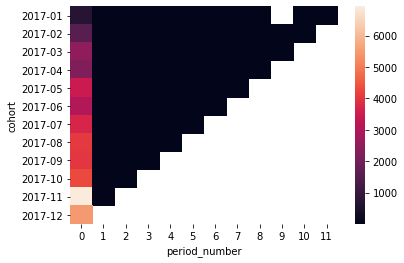

In [52]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(cohort_pivot)
sns.set(rc = {'figure.figsize':(12,8)})

Второй вариант:

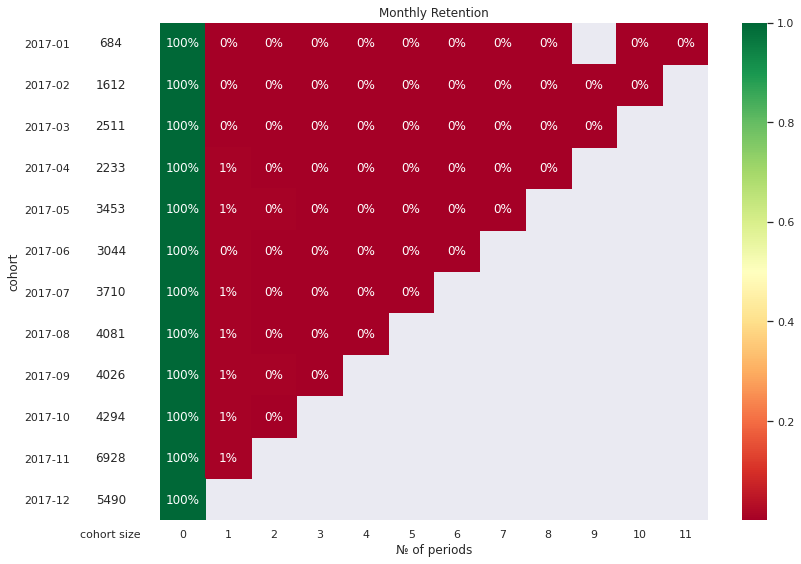

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

sns.heatmap(retention,
            mask=retention.isnull(),
            annot=True,
            fmt='.0%',
            cmap='RdYlGn',
            ax=ax[1])
ax[1].set_title('Monthly Retention', fontsize=12)
ax[1].set(xlabel='№ of periods', ylabel='')
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort size'})
white_cmap = ListedColormap(['white'])
sns.heatmap(cohort_size_df,
            annot=True,
            cbar=False,
            fmt='g',
            cmap=white_cmap,
            ax=ax[0])
fig.tight_layout()

О когорте с самым высоким retention за третий месяц ответим по сводной таблице __retention__, этой когорте соответствует когорта 2017-09 со значением 0.004968.

# Задание 6

#### Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

Отберем из каждого датасета *df1*, *df2*, *df3* инересующие нас колонки:

In [3]:
df1_filtered = df1[["customer_id", "customer_unique_id"]]
df2_filtered = df2[["order_id", "customer_id", "order_status","order_approved_at"]]
df3_filtered = df3[["order_id", "price"]]

In [4]:
tmp = df1_filtered.merge(df2_filtered, on='customer_id')

In [5]:
sales = tmp.merge(df3_filtered, on="order_id")

In [7]:
sales

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,230.00
...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 16:08:45,74.90
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:35:12,114.90
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:30:03,37.00
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:31:20,689.00


Уберем дубликаты, возникшие при объединении:

In [6]:
sales = sales.drop_duplicates()

In [7]:
sales.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,230.00


Нас интересует сколько раз пользователь совершал покупок, т.е. надо посчитать заказы.  
Создадим таблицу заказов, который будет агрегировать наши продажи на уровне заказа:

In [8]:
orders = sales.groupby(['order_id', 'order_approved_at', 'customer_unique_id']).agg({'price':"sum"}).reset_index()
orders

,order_id,order_approved_at,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.90
...,...,...,...,...
98647,fffc94f6ce00a00581880bf54a75a037,2018-04-25 04:11:01,0c9aeda10a71f369396d0c04dce13a64,299.99
98648,fffcd46ef2263f404302a634eb57f7eb,2018-07-17 04:31:48,0da9fe112eae0c74d3ba1fe16de0988b,350.00
98649,fffce4705a9662cd70adb13d4a31832d,2017-10-24 17:14:25,cd79b407828f02fdbba457111c38e4c4,99.90
98650,fffe18544ffabc95dfada21779c9644f,2017-08-15 00:04:32,eb803377c9315b564bdedad672039306,55.99


Установим дату на один день после последней покупки. Эта дата будет использоваться в качестве ориентира для подсчета __recency__ баллов:

In [9]:
now = orders['order_approved_at'].max() + timedelta(days=1)

In [10]:
now

Timestamp('2018-09-04 17:40:06')

Данные будем изучать в течение года:

In [11]:
period = 365

Добавим столбец с количеством дней между покупкой и текущим временем. Чтобы найти значения __recency__, возьмем минимум из столбца для каждого пользователя:

In [12]:
orders['days_since_order'] = orders['order_approved_at'].apply(lambda x: (now - x).days)

In [13]:
orders.head()

,order_id,order_approved_at,customer_unique_id,price,days_since_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.90,356
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.90,496
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,199.00,233
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,12.99,27
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.90,577


Баллы (score) рассчитываются для каждого пользователя. Нам нужен датафрейм данных с одной строкой для каждого клиента:

In [14]:
aggr = {
    'days_since_order': lambda x: x.min(), # количество дней с последнего заказа (recency)
    'order_approved_at': lambda x: len([d for d in x if d >= now - timedelta(days=period)]), # общее количество заказов за
                                                                                             # последний период (frequency)
       }
rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'recency', 'order_approved_at': 'frequency'}, inplace=True)

In [15]:
rfm

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1
...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,0
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1
95404,ffff371b4d645b6ecea244b27531430a,574,0
95405,ffff5962728ec6157033ef9805bacc48,125,1


Теперь нам необходимо рассчитать сумму затрат каждого пользователя __monetory__ за последний год:

In [16]:
rfm['monetary'] = rfm['customer_unique_id'].apply(lambda x: orders[(orders['customer_unique_id'] == x) & \
                                                            (orders['order_approved_at'] >= now - timedelta(days=period))] \
                                                            ['price'].sum())

In [17]:
rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,0,0.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,0,0.00
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
95404,ffff371b4d645b6ecea244b27531430a,574,0,0.00
95405,ffff5962728ec6157033ef9805bacc48,125,1,115.00


Рассчитаем __rfm__ баллы. Каждому пользователю по каждому параметру присвоим баллы в диапазоне [1:5]. Разобьем наш диапазон на пять частей квантилями по 20% каждый:

In [18]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'frequency': {0.2: 0.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 0.0, 0.4: 39.9, 0.6: 79.0, 0.8: 143.8}}

Присвоим каждому из квантилей ранг. Чем меньше ранг __recency__, тем лучше, тогда как для __frequency__ и __monetary__ наоборот:

In [19]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

Присвоим каждому пользователю соответствующие __R, F__ и __M__ баллы:

In [20]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

Создадим колонку __RFM_score__ со всеми RFM оценками:

In [21]:
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,2,4,424
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,2,2,422
2,0000f46a3911fa3c0805444483337064,542,0,0.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,2,2,222
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,2,5,225


Разобьем наших пользователей на сегменты на основе показателей __R__ и __F__. Дадим описание сегментам: 

In [23]:
data = {"Сегменты": ['Лучший', 'Лояльный', 'Потенциально лояльный', 'Перспективный', 'Рисковый', 'Не могу потерять', 'Уснул'],
        "Описание": ['Покупал недавно, покупает чаще и больше всех', 'Покупает на регулярной основе',
                     'Недавний клиент со средней частотой', 'Пришел недавно и покупал немного', 
                     'Покупал часто, но давно', 'Часто покупал, но давно нету', 'Давно покупал и покупал мало']}
pd.DataFrame(data)

,Сегменты,Описание
0,Лучший,"Покупал недавно, покупает чаще и больше всех"
1,Лояльный,Покупает на регулярной основе
2,Потенциально лояльный,Недавний клиент со средней частотой
3,Перспективный,Пришел недавно и покупал немного
4,Рисковый,"Покупал часто, но давно"
5,Не могу потерять,"Часто покупал, но давно нету"
6,Уснул,Давно покупал и покупал мало


In [24]:
segt_map = {
    r'5[4-5]': 'Лучший',
    r'[3-4][4-5]': 'Лояльный',
    r'[3-5][2-3]': 'Потенциально лояльный',
    r'[3-5]1': 'Перспективный',
    r'[1-2][3-4]': 'Рисковый',
    r'[1-2]5': 'Не могу потерять',
    r'[1-2][1-2]': 'Уснул'
}

rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,2,4,424,Потенциально лояльный
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,2,2,422,Потенциально лояльный
2,0000f46a3911fa3c0805444483337064,542,0,0.00,1,1,1,111,Уснул
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,2,2,222,Уснул
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,2,5,225,Уснул


In [28]:
rfm_hist = rfm.groupby("segment", as_index=False) \
              .agg({"RFM_score": "count"}) \
              .rename(columns={'RFM_score': 'quantity'}) \
              .sort_values("quantity", ascending=False)
rfm_hist = rfm_hist.assign(quantity_percent = round(rfm_hist.quantity/rfm_hist.quantity.sum()*100, 1))
rfm_hist

,segment,quantity,quantity_percent
3,Потенциально лояльный,55826,58.5
4,Уснул,37735,39.6
0,Лояльный,981,1.0
1,Лучший,558,0.6
2,Не могу потерять,307,0.3


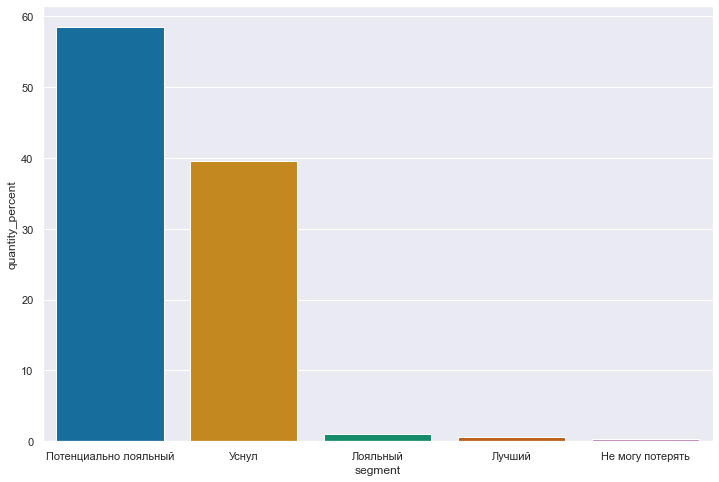

In [120]:
sns.barplot(data=rfm_hist, x="segment", y="quantity_percent", palette='colorblind')
sns.set(rc = {'figure.figsize':(12,8)})

Как результат: *лучшие* с *лояльными* составляют 1.6% от общей популяции. Это тот процент пользователей, которые составляют наш бюджет. Особое внимание следует уделить группе *потенциально лояльных*. Необходимо провести анализ над тем, как нам следует их *перевести* в сегмент выше.